In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor

In [ ]:
# To show all the columns of result
pd.set_option('display.max_columns', None)

In [ ]:
# To show all the rows of the result
pd.set_option('display.max_rows', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TEST transaction csv file
# df_testran = pd.read_csv('/content/drive/MyDrive/BTTAI23/CSV_files/test_transaction.csv')

# TRAIN transaction csv file
df_traintran = pd.read_csv('/content/drive/MyDrive/BTTAI23/CSV_files/train_transaction.csv')

In [ ]:
# TEST identity csv file
df_testiden = pd.read_csv('/content/drive/MyDrive/BTTAI23/CSV_files/test_identity.csv')

# TRAIN identity csv file
df_trainiden = pd.read_csv('/content/drive/MyDrive/BTTAI23/CSV_files/train_identity.csv')

In [ ]:
# SHAPE of Datasets
# print(df_testran.shape)
print(df_traintran.shape)
print(df_testiden.shape)
print(df_trainiden.shape)

(590540, 394)
(141907, 41)
(144233, 41)


In [ ]:
df_traintran.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [ ]:
type(df_traintran)

pandas.core.frame.DataFrame

In [ ]:
fraud_counts = df_traintran['isFraud'].value_counts()

# Display the counts
print("Count of Fraud and Not Fraud:")
print(fraud_counts)

Count of Fraud and Not Fraud:
0    569877
1     20663
Name: isFraud, dtype: int64


In [ ]:
traintran_name = list(df_traintran.columns)
traintran_name.remove('isFraud')
df_traintran = df_traintran.reindex(columns=traintran_name+['isFraud'])

In [ ]:
df_traintran['isFraud'].unique()

array([0, 1])

In [ ]:
df_traintran_bat = np.array_split(df_traintran, 6)

In [ ]:
df_traintran_bat[2].shape

(98423, 394)

Handle Missing Data

In [ ]:
numericalist_traintran = df_traintran.drop(columns = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3',
                                            'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'R_emaildomain'])

In [ ]:
strlist_traintran = df_traintran[['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'R_emaildomain']]

In [ ]:
def find_missing_value(df):
    misval = df.isnull()
    numisval = misval.sum()
    return numisval

In [ ]:
nan_traintran = {}
for i in numericalist_traintran:
    j = find_missing_value(df_traintran[i])
    nan_traintran[i] = j/590540

nan_traintran

{'TransactionID': 0.0,
 'TransactionDT': 0.0,
 'TransactionAmt': 0.0,
 'card1': 0.0,
 'card2': 0.015126833068039422,
 'card3': 0.0026501168422122124,
 'card5': 0.007212043214684865,
 'addr1': 0.1112642666034477,
 'addr2': 0.1112642666034477,
 'dist1': 0.596523520845328,
 'dist2': 0.9362837403054831,
 'C1': 0.0,
 'C2': 0.0,
 'C3': 0.0,
 'C4': 0.0,
 'C5': 0.0,
 'C6': 0.0,
 'C7': 0.0,
 'C8': 0.0,
 'C9': 0.0,
 'C10': 0.0,
 'C11': 0.0,
 'C12': 0.0,
 'C13': 0.0,
 'C14': 0.0,
 'D1': 0.0021488806854743116,
 'D2': 0.4754919226470688,
 'D3': 0.44514850814508755,
 'D4': 0.2860466691502693,
 'D5': 0.524674027161581,
 'D6': 0.8760676668811597,
 'D7': 0.9340992989467267,
 'D8': 0.8731229044603245,
 'D9': 0.8731229044603245,
 'D10': 0.1287330240119213,
 'D11': 0.47293494090154775,
 'D12': 0.8904104717715988,
 'D13': 0.8950926270870728,
 'D14': 0.8946946862193924,
 'D15': 0.1509008703898127,
 'V1': 0.47293494090154775,
 'V2': 0.47293494090154775,
 'V3': 0.47293494090154775,
 'V4': 0.47293494090154775,

In [ ]:
for i in numericalist_traintran.columns:
    df_traintran_bat[0][i].fillna(value = df_traintran_bat[0][i].mean(), inplace = True)

In [ ]:
for i in strlist_traintran.columns:
    df_traintran_bat[0][i].fillna(value = 'N/A', inplace = True)

In [ ]:
strlist = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'P_emaildomain', 'R_emaildomain']

In [ ]:
for element in strlist:
    print(df_traintran[element].unique())

['W' 'H' 'C' 'S' 'R']
['discover' 'mastercard' 'visa' 'american express' nan]
['credit' 'debit' nan 'debit or credit' 'charge card']
['T' nan 'F']
['T' nan 'F']
['T' nan 'F']
['M2' 'M0' nan 'M1']
['F' 'T' nan]
['T' 'F' nan]
[nan 'F' 'T']
[nan 'F' 'T']
[nan 'F' 'T']
[nan 'gmail.com' 'outlook.com' 'yahoo.com' 'mail.com' 'anonymous.com'
 'hotmail.com' 'verizon.net' 'aol.com' 'me.com' 'comcast.net'
 'optonline.net' 'cox.net' 'charter.net' 'rocketmail.com' 'prodigy.net.mx'
 'embarqmail.com' 'icloud.com' 'live.com.mx' 'gmail' 'live.com' 'att.net'
 'juno.com' 'ymail.com' 'sbcglobal.net' 'bellsouth.net' 'msn.com' 'q.com'
 'yahoo.com.mx' 'centurylink.net' 'servicios-ta.com' 'earthlink.net'
 'hotmail.es' 'cfl.rr.com' 'roadrunner.com' 'netzero.net' 'gmx.de'
 'suddenlink.net' 'frontiernet.net' 'windstream.net' 'frontier.com'
 'outlook.es' 'mac.com' 'netzero.com' 'aim.com' 'web.de' 'twc.com'
 'cableone.net' 'yahoo.fr' 'yahoo.de' 'yahoo.es' 'sc.rr.com' 'ptd.net'
 'live.fr' 'yahoo.co.uk' 'hotmail.fr'

In [ ]:
df_traintran_bat[0].head(30)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1       card2  \
0         2987000          86400          68.500         W  13926  370.774624   
1         2987001          86401          29.000         W   2755  404.000000   
2         2987002          86469          59.000         W   4663  490.000000   
3         2987003          86499          50.000         W  18132  567.000000   
4         2987004          86506          50.000         H   4497  514.000000   
5         2987005          86510          49.000         W   5937  555.000000   
6         2987006          86522         159.000         W  12308  360.000000   
7         2987007          86529         422.500         W  12695  490.000000   
8         2987008          86535          15.000         H   2803  100.000000   
9         2987009          86536         117.000         W  17399  111.000000   
10        2987010          86549          75.887         C  16496  352.000000   
11        2987011          86555          16.495         C   4461  375.000000   
12        2987012          86564          50.000         W   3786  418.000000   
13        2987013          86585          40.000         W  12866  303.000000   
14        2987014          86596          10.500         W  11839  490.000000   
15        2987015          86618          57.950         W   7055  555.000000   
16        2987016          86620          30.000         H   1790  555.000000   
17        2987017          86668         100.000         H  11492  111.000000   
18        2987018          86725          47.950         W   4663  490.000000   
19        2987019          86730         186.000         W   7005  111.000000   
20        2987020          86761          39.000         W   7875  314.000000   
21        2987021          86769         159.950         W  11401  543.000000   
22        2987022          86786          50.000         H   1724  583.000000   
23        2987023          86808         107.950         W   2392  360.000000   
24        2987024          86821          73.950         W  10112  360.000000   
25        2987025          86944         107.950         W  15385  111.000000   
26        2987026          86945         184.000         W  17868  148.000000   
27        2987027          86972          47.950         W  11307  321.000000   
28        2987028          86973          20.000         W   8431  269.000000   
29        2987029          86979          36.990         W  12932  361.000000   

    card3       card4  card5   card6       addr1      addr2       dist1  \
0   150.0    discover  142.0  credit  315.000000  87.000000   19.000000   
1   150.0  mastercard  102.0  credit  325.000000  87.000000  124.458842   
2   150.0        visa  166.0   debit  330.000000  87.000000  287.000000   
3   150.0  mastercard  117.0   debit  476.000000  87.000000  124.458842   
4   150.0  mastercard  102.0  credit  420.000000  87.000000  124.458842   
5   150.0        visa  226.0   debit  272.000000  87.000000   36.000000   
6   150.0        visa  166.0   debit  126.000000  87.000000    0.000000   
7   150.0        visa  226.0   debit  325.000000  87.000000  124.458842   
8   150.0        visa  226.0   debit  337.000000  87.000000  124.458842   
9   150.0  mastercard  224.0   debit  204.000000  87.000000   19.000000   
10  117.0  mastercard  134.0  credit  291.411914  86.234927  124.458842   
11  185.0  mastercard  224.0   debit  291.411914  86.234927  124.458842   
12  150.0        visa  226.0   debit  204.000000  87.000000  124.458842   
13  150.0        visa  226.0   debit  330.000000  87.000000  124.458842   
14  150.0        visa  226.0   debit  226.000000  87.000000  124.458842   
15  150.0        visa  226.0   debit  315.000000  87.000000    3.000000   
16  150.0        visa  226.0   debit  170.000000  87.000000  124.458842   
17  150.0  mastercard  219.0  credit  204.000000  87.000000  124.458842   
18  150.0        visa  166.0   debit  184.000000  87.000000    5.00

In [ ]:
df_traintran_bat[0]['P_emaildomain1'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])
df_traintran_bat[0]['P_emaildomain2'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])
df_traintran_bat[0]['P_emaildomain3'] = [None] * len(df_traintran_bat[0]['P_emaildomain'])

for i in range(len(df_traintran_bat[0]['P_emaildomain'])):
    df_traintran_bat[0]['P_emaildomain'][i] = ''.join(df_traintran_bat[0]['P_emaildomain'][i]).split('.')
    df_traintran_bat[0]['P_emaildomain1'][i] = df_traintran_bat[0]['P_emaildomain'][i][0]
    df_traintran_bat[0]['P_emaildomain2'][i] = 'N/A'
    df_traintran_bat[0]['P_emaildomain3'][i] = 'N/A'
    if len(df_traintran_bat[0]['P_emaildomain'][i]) == 2:
        df_traintran_bat[0]['P_emaildomain2'][i] = df_traintran_bat[0]['P_emaildomain'][i][1]
    elif len(df_traintran_bat[0]['P_emaildomain'][i]) == 3:
        df_traintran_bat[0]['P_emaildomain3'][i] = df_traintran_bat[0]['P_emaildomain'][i][2]

<ipython-input-25-6c56b31bf12a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran_bat[0]['P_emaildomain'][i] = ''.join(df_traintran_bat[0]['P_emaildomain'][i]).split('.')
<ipython-input-25-6c56b31bf12a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran_bat[0]['P_emaildomain1'][i] = df_traintran_bat[0]['P_emaildomain'][i][0]
<ipython-input-25-6c56b31bf12a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train

In [ ]:
df_traintran_bat[0]['P_emaildomain'][3][0]

'yahoo'

In [ ]:
df_traintran_bat[0].head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1       card2  \
0        2987000          86400            68.5         W  13926  370.774624   
1        2987001          86401            29.0         W   2755  404.000000   
2        2987002          86469            59.0         W   4663  490.000000   
3        2987003          86499            50.0         W  18132  567.000000   
4        2987004          86506            50.0         H   4497  514.000000   

   card3       card4  card5   card6  addr1  addr2       dist1       dist2  \
0  150.0    discover  142.0  credit  315.0   87.0   19.000000  238.314176   
1  150.0  mastercard  102.0  credit  325.0   87.0  124.458842  238.314176   
2  150.0        visa  166.0   debit  330.0   87.0  287.000000  238.314176   
3  150.0  mastercard  117.0   debit  476.0   87.0  124.458842  238.314176   
4  150.0  mastercard  102.0  credit  420.0   87.0  124.458842  238.314176   

    P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           [N/A]           N/A  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1    [gmail, com]           N/A  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  [outlook, com]           N/A  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3    [yahoo, com]           N/A  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4    [gmail, com]           N/A  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1          D2         D3          D4  \
0  0.0  2.0  0.0   1.0  1.0   14.0  165.097346  13.000000  127.548887   
1  0.0  1.0  0.0   1.0  1.0    0.0  165.097346  29.165838    0.000000   
2  0.0  1.0  0.0   1.0  1.0    0.0  165.097346  29.165838    0.000000   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.000000   0.000000   94.000000   
4  1.0  1.0  0.0   1.0  1.0    0.0  165.097346  29.165838  127.548887   

          D5        D6         D7          D8        D9         D10  \
0  41.877942  62.12193  58.560162  177.482365  0.579902   13.000000   
1  41.877942  62.12193  58.560162  177.482365  0.579902    0.000000   
2  41.877942  62.12193  58.560162  177.482365  0.579902    0.000000   
3   0.000000  62.12193  58.560162  177.482365  0.579902   84.000000   
4  41.877942  62.12193  58.560162  177.482365  0.579902  116.155878   

          D11        D12       D13        D14         D15   M1   M2   M3   M4  \
0   13.000000  46.418338  17.87376  46.094569    0.000000    T    T    T   M2   
1  120.431004  46.418338  17.87376  46.094569    0.000000  N/A  N/A  N/A   M0   
2  315.000000  46.418338  17.87376  46.094569  315.000000    T    T    T   M0   
3  120.431004  46.418338  17.87376  46.094569  111.000000  N/A  N/A  N/A   M0   
4  120.431004  46.418338  17.87376  46.094569  148.748794  N/A  N/A  N/A  N/A   

    M5   M6   M7   M8   M9        V1        V2        V3        V4        V5  \
0    F    T  N/A  N/A  N/A  1.000000  1.000000  1.000000  1.000000  1.000000   
1    T    T  N/A  N/A  N/A  0.999824  1.024432  1.050275  0.813813  0.844169   
2    F    F    F    F    F  1.000000  1.000000  1.000000  1.000000  1.000000   
3    T    F  N/A  N/A  N/A  0.999824  1.024432  1.050275  0.813813  0.844169   
4  N/A  N/A  N/A  N/A  N/A  0.999824  1.024432  1.050275  0.813813  0.844169   

         V6        V7        V8        V9       V10       V11       V12  \
0  1.000000  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
1  1.027641  1.051685  1.014314  1.027147  0.469222  0.482302  0.000000   
2  1.000000  1.000000  1.000000  1.000000  0.000000  0.000000  1.000000   
3  1.027641  1.051685  1.014314  1.027147  0.469222  0.482302  1.000000   
4  1.027641  1.051685  1.014314  1.027147  0.469222  0.482302  0.492681   

       V13       V14       V15       V16       V17       V18       V19  \
0  1.00000  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
1  0.00000  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
2  1.00000  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000 

In [ ]:
df_traintran_bat[0]['R_emaildomain1'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])
df_traintran_bat[0]['R_emaildomain2'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])
df_traintran_bat[0]['R_emaildomain3'] = [None] * len(df_traintran_bat[0]['R_emaildomain'])

for i in range(len(df_traintran_bat[0]['R_emaildomain'])):
    df_traintran_bat[0]['R_emaildomain'][i] = ''.join(df_traintran_bat[0]['R_emaildomain'][i]).split('.')
    df_traintran_bat[0]['R_emaildomain1'][i] = df_traintran_bat[0]['R_emaildomain'][i][0]
    df_traintran_bat[0]['R_emaildomain2'][i] = 'N/A'
    df_traintran_bat[0]['R_emaildomain3'][i] = 'N/A'
    if len(df_traintran_bat[0]['R_emaildomain'][i]) == 2:
        df_traintran_bat[0]['R_emaildomain2'][i] = df_traintran_bat[0]['R_emaildomain'][i][1]
    elif len(df_traintran_bat[0]['R_emaildomain'][i]) == 3:
        df_traintran_bat[0]['R_emaildomain3'][i] = df_traintran_bat[0]['R_emaildomain'][i][2]

<ipython-input-28-48f9ed86fbfd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran_bat[0]['R_emaildomain'][i] = ''.join(df_traintran_bat[0]['R_emaildomain'][i]).split('.')
<ipython-input-28-48f9ed86fbfd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_traintran_bat[0]['R_emaildomain1'][i] = df_traintran_bat[0]['R_emaildomain'][i][0]
<ipython-input-28-48f9ed86fbfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train

In [ ]:
df_traintran_bat[0].head(20)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1       card2  \
0         2987000          86400          68.500         W  13926  370.774624   
1         2987001          86401          29.000         W   2755  404.000000   
2         2987002          86469          59.000         W   4663  490.000000   
3         2987003          86499          50.000         W  18132  567.000000   
4         2987004          86506          50.000         H   4497  514.000000   
5         2987005          86510          49.000         W   5937  555.000000   
6         2987006          86522         159.000         W  12308  360.000000   
7         2987007          86529         422.500         W  12695  490.000000   
8         2987008          86535          15.000         H   2803  100.000000   
9         2987009          86536         117.000         W  17399  111.000000   
10        2987010          86549          75.887         C  16496  352.000000   
11        2987011          86555          16.495         C   4461  375.000000   
12        2987012          86564          50.000         W   3786  418.000000   
13        2987013          86585          40.000         W  12866  303.000000   
14        2987014          86596          10.500         W  11839  490.000000   
15        2987015          86618          57.950         W   7055  555.000000   
16        2987016          86620          30.000         H   1790  555.000000   
17        2987017          86668         100.000         H  11492  111.000000   
18        2987018          86725          47.950         W   4663  490.000000   
19        2987019          86730         186.000         W   7005  111.000000   

    card3       card4  card5   card6       addr1      addr2       dist1  \
0   150.0    discover  142.0  credit  315.000000  87.000000   19.000000   
1   150.0  mastercard  102.0  credit  325.000000  87.000000  124.458842   
2   150.0        visa  166.0   debit  330.000000  87.000000  287.000000   
3   150.0  mastercard  117.0   debit  476.000000  87.000000  124.458842   
4   150.0  mastercard  102.0  credit  420.000000  87.000000  124.458842   
5   150.0        visa  226.0   debit  272.000000  87.000000   36.000000   
6   150.0        visa  166.0   debit  126.000000  87.000000    0.000000   
7   150.0        visa  226.0   debit  325.000000  87.000000  124.458842   
8   150.0        visa  226.0   debit  337.000000  87.000000  124.458842   
9   150.0  mastercard  224.0   debit  204.000000  87.000000   19.000000   
10  117.0  mastercard  134.0  credit  291.411914  86.234927  124.458842   
11  185.0  mastercard  224.0   debit  291.411914  86.234927  124.458842   
12  150.0        visa  226.0   debit  204.000000  87.000000  124.458842   
13  150.0        visa  226.0   debit  330.000000  87.000000  124.458842   
14  150.0        visa  226.0   debit  226.000000  87.000000  124.458842   
15  150.0        visa  226.0   debit  315.000000  87.000000    3.000000   
16  150.0        visa  226.0   debit  170.000000  87.000000  124.458842   
17  150.0  mastercard  219.0  credit  204.000000  87.000000  124.458842   
18  150.0        visa  166.0   debit  184.000000  87.000000    5.000000   
19  150.0        visa  226.0   debit  264.000000  87.000000  124.458842   

         dist2     P_emaildomain   R_emaildomain   C1   C2   C3   C4   C5  \
0   238.314176             [N/A]           [N/A]  1.0  1.0  0.0  0.0  0.0   
1   238.314176      [gmail, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
2   238.314176    [outlook, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
3   238.314176      [yahoo, com]           [N/A]  2.0  5.0  0.0  0.0  0.0   
4   238.314176      [gmail, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
5   238.314176      [gmail, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
6   238.314176      [yahoo, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
7   238.314176       [mail, com]           [N/A]  1.0  1.0  0.0  0.0  0.0   
8   238.314176  [anonymous, com] 

In [ ]:
# MLF module 3.2
strlist_update = ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
                  'P_emaildomain1', 'P_emaildomain2', 'P_emaildomain3', 'R_emaildomain1', 'R_emaildomain2',
                 'R_emaildomain3']
batch0_onehotencode = pd.get_dummies(df_traintran_bat[0], columns = strlist_update)

In [ ]:
type(batch0_onehotencode)

pandas.core.frame.DataFrame

In [ ]:
# for i in range(591):
#     if batch0_onehotencode['isFraud'][i] == 1:
#         batch0_onehotencode['isFraud'][i] = True
#     elif batch0_onehotencode['isFraud'][i] == 0:
#         batch0_onehotencode['isFraud'][i] = False

In [ ]:
print(batch0_onehotencode['isFraud'])
batch0_onehotencode['isFraud'] = batch0_onehotencode['isFraud'].astype(bool)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54       0
55       0
56       0
57       0
58       0
59       0
60       0
61       0
62       0
63       0
64       0
65       0
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [ ]:
corrs_sorted = abs(batch0_onehotencode.corr()['isFraud']).sort_values(ascending = False)
print(corrs_sorted)


<ipython-input-34-364e64d98b35>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs_sorted = abs(batch0_onehotencode.corr()['isFraud']).sort_values(ascending = False)


isFraud                        1.000000
V201                           0.243455
V189                           0.225601
V45                            0.220286
V200                           0.213222
V257                           0.200891
V188                           0.190895
V44                            0.188142
V87                            0.187130
V246                           0.172664
V86                            0.167798
V171                           0.167135
V52                            0.165173
V244                           0.160682
V198                           0.150402
V233                           0.149832
V242                           0.148674
V51                            0.144277
card3                          0.142666
ProductCD_C                    0.142640
V231                           0.140675
V113                           0.138527
V123                           0.138198
V79                            0.137991
V111                           0.137753


['V201', 'V189', 'V45', 'V200', 'V257', 'V188', 'V44', 'V87', 'V246', 'V86']


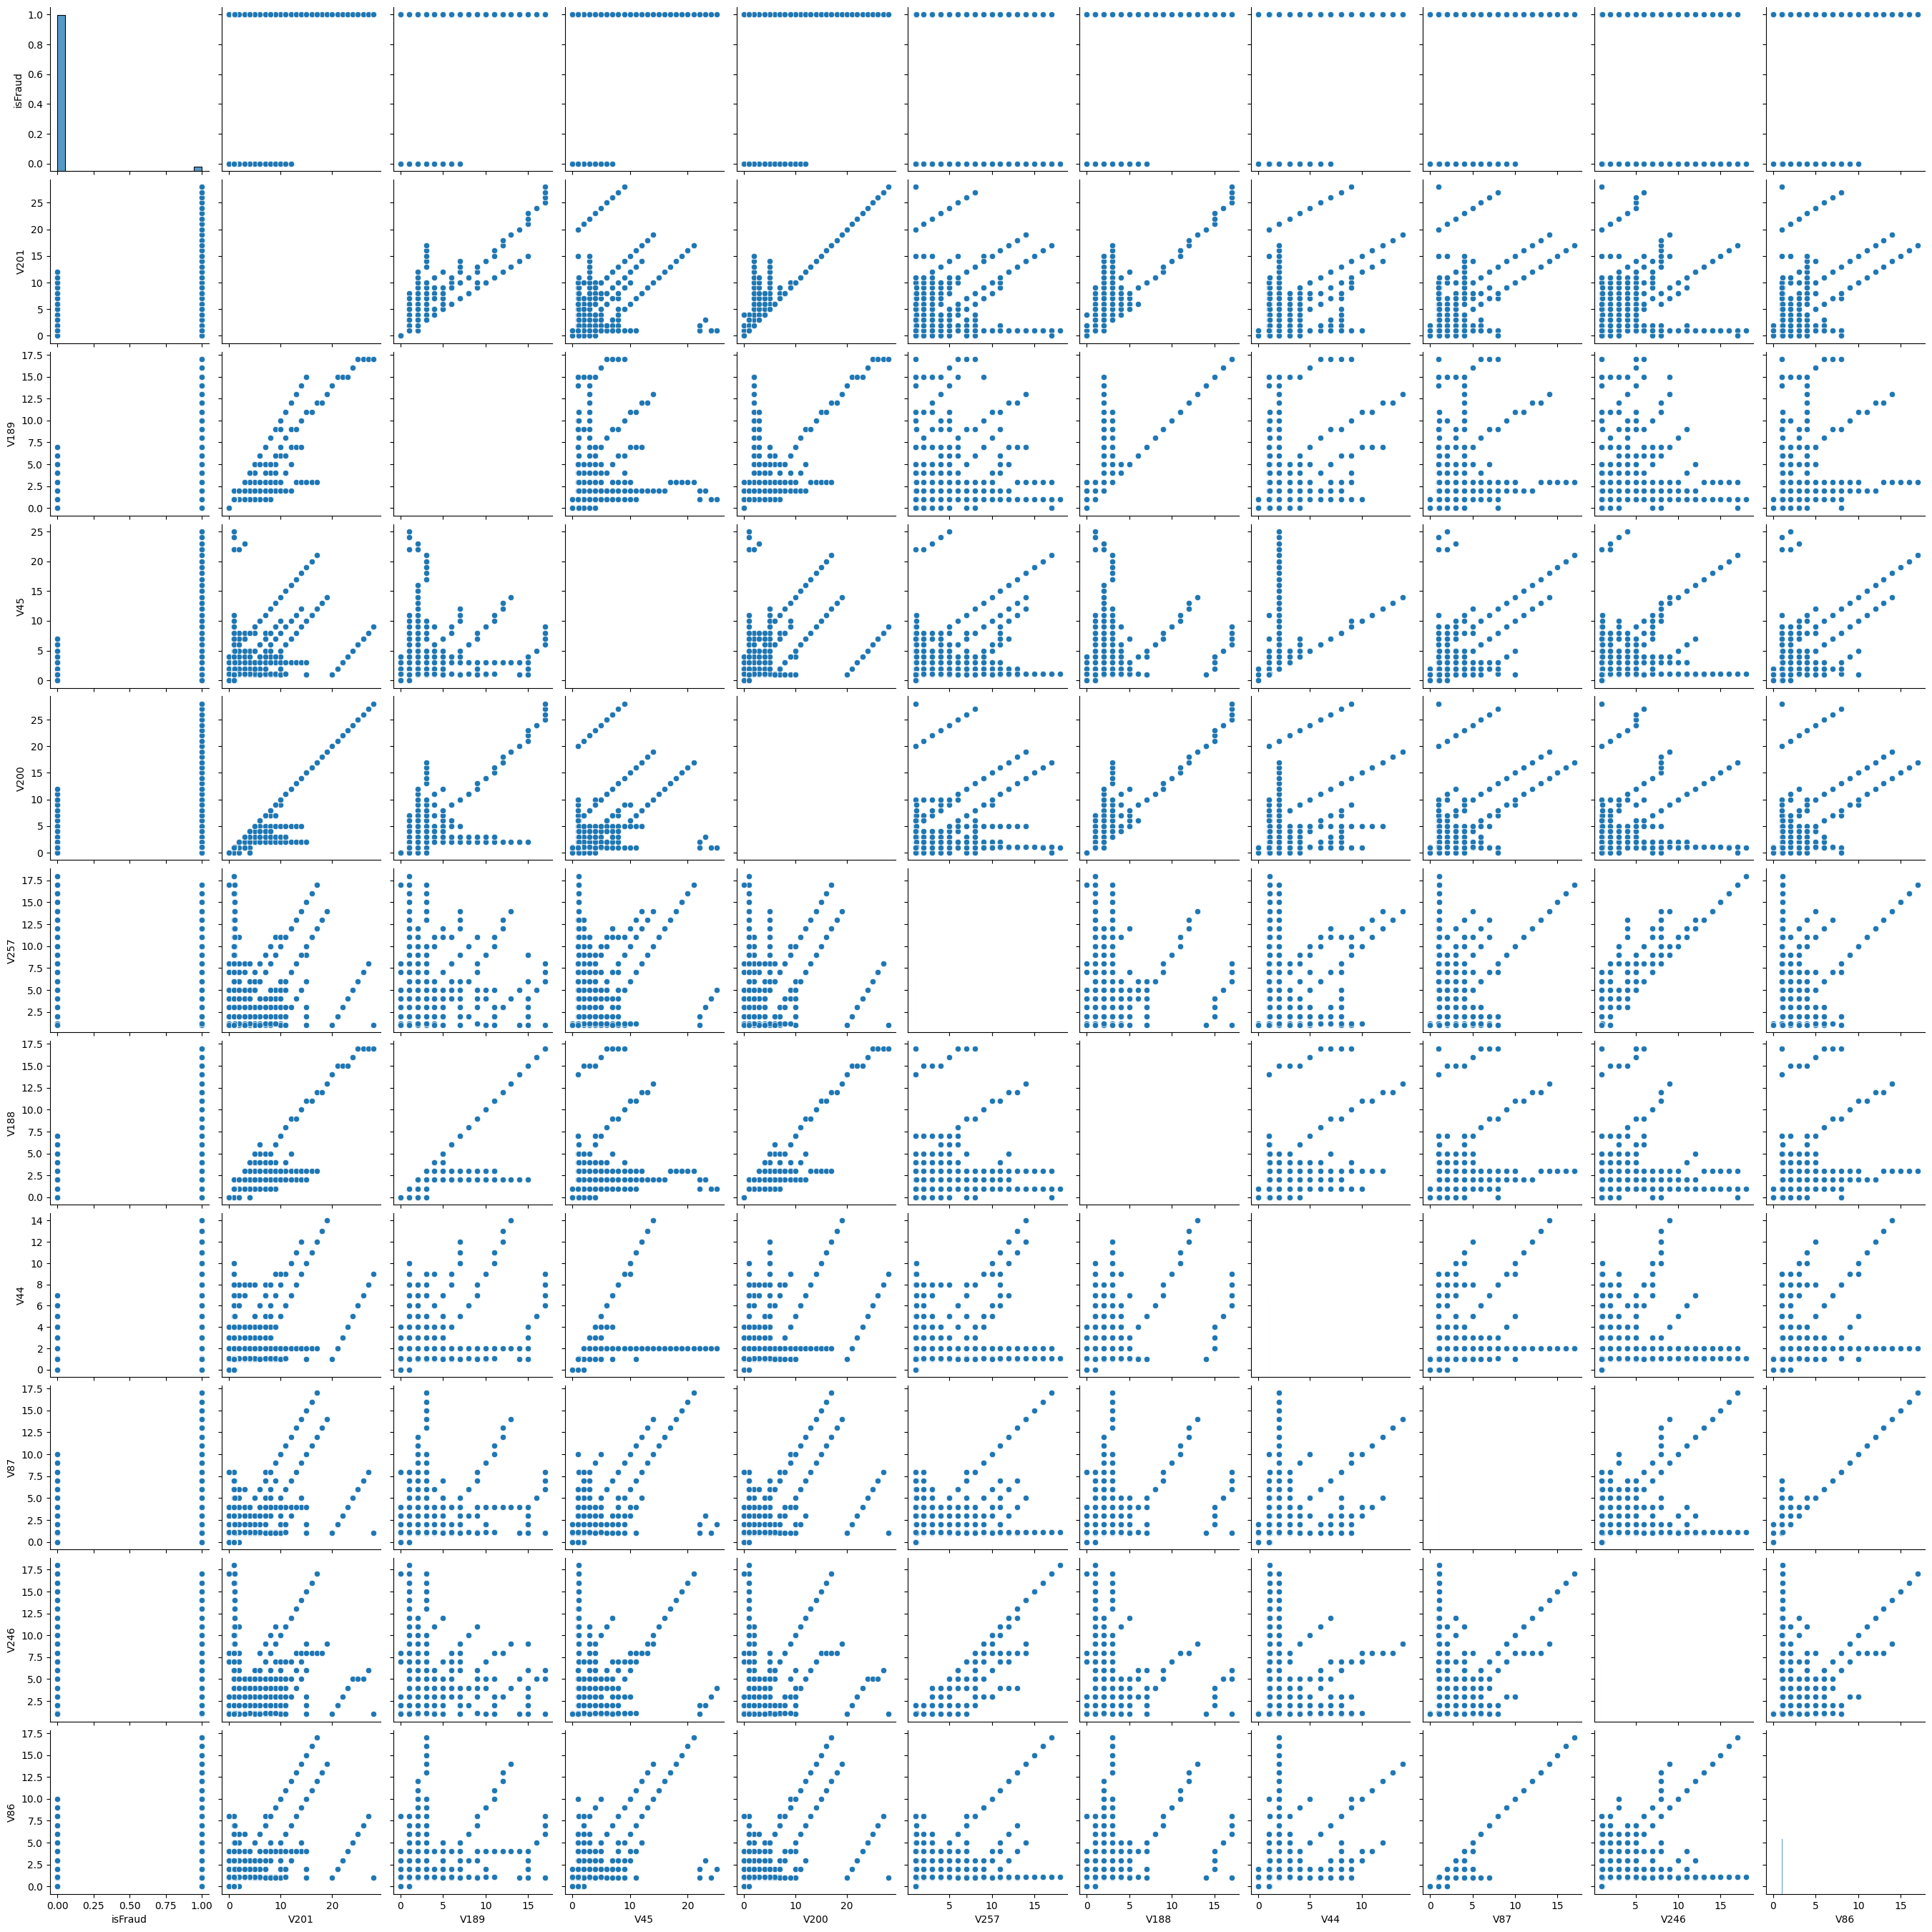

In [ ]:
# top_seven_corr = list(corrs_sorted.index[1:8])
# print(top_seven_corr) # all with numerical type
# df_sub = df_traintran_bat[0][['isFraud',top_seven_corr[0], top_seven_corr[1], top_seven_corr[2], top_seven_corr[3],
#             top_seven_corr[4], top_seven_corr[5], top_seven_corr[6]]]
# sns.pairplot(df_sub)
# look at row1[1:]
# top 10 values that have the highest correlation
top_ten_corr = list(corrs_sorted.index[1:11])
print(top_ten_corr) # all with numerical type
df_sub = df_traintran_bat[0][['isFraud',top_ten_corr[0], top_ten_corr[1], top_ten_corr[2], top_ten_corr[3],
            top_ten_corr[4], top_ten_corr[5], top_ten_corr[6], top_ten_corr[7], top_ten_corr[8], top_ten_corr[9]]]
sns.pairplot(df_sub)

Perform Logistic Regression

In [ ]:
# Define the features and target column
columns_to_drop = ['isFraud', 'P_emaildomain','R_emaildomain']
X = batch0_onehotencode.drop(columns_to_drop, axis=1)
y = batch0_onehotencode['isFraud']
m = len(y)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)
X_train.head()


TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
19922        3006922         516392           300.0   3670  111.0  150.0   
68101        3055101        1541886            49.0  13481  199.0  150.0   
12339        2999339         349331            50.0  17188  321.0  150.0   
52783        3039783        1235489           100.0  10112  360.0  150.0   
4742         2991742         168920           224.0   7919  194.0  150.0   

       card5  addr1  addr2       dist1       dist2   C1   C2   C3   C4   C5  \
19922  226.0  420.0   87.0  124.458842  238.314176  1.0  1.0  0.0  0.0  0.0   
68101  224.0  325.0   87.0  124.458842  238.314176  2.0  3.0  0.0  0.0  0.0   
12339  226.0  310.0   87.0  124.458842  238.314176  1.0  1.0  0.0  0.0  0.0   
52783  166.0  299.0   87.0  124.458842  238.314176  1.0  1.0  0.0  0.0  1.0   
4742   166.0  472.0   87.0   31.000000  238.314176  1.0  2.0  0.0  0.0  0.0   

        C6   C7   C8   C9  C10  C11  C12   C13  C14     D1          D2  \
19922  1.0  0.0  0.0  1.0  0.0  1.0  0.0   7.0  1.0  184.0  184.000000   
68101  1.0  0.0  0.0  5.0  0.0  3.0  0.0  10.0  1.0   40.0   40.000000   
12339  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0  165.097346   
52783  1.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0  0.0    0.0  165.097346   
4742   1.0  0.0  0.0  2.0  0.0  1.0  0.0  13.0  1.0  424.0  424.000000   

              D3          D4         D5        D6         D7          D8  \
19922   6.000000  184.000000   6.000000  62.12193  58.560162  177.482365   
68101   0.000000  127.548887  41.877942  62.12193  58.560162  177.482365   
12339  29.165838  127.548887  41.877942  62.12193  58.560162  177.482365   
52783  29.165838    0.000000  41.877942  62.12193  58.560162  177.482365   
4742   25.000000  424.000000  25.000000  62.12193  58.560162  177.482365   

             D9         D10         D11        D12       D13        D14  \
19922  0.579902  184.000000  120.431004  46.418338  17.87376  46.094569   
68101  0.579902   31.000000  120.431004  46.418338  17.87376  46.094569   
12339  0.579902  116.155878  120.431004  46.418338  17.87376  46.094569   
52783  0.579902    0.000000  120.431004  46.418338  17.87376  46.094569   
4742   0.579902  302.000000  302.000000  46.418338  17.87376  46.094569   

              D15        V1        V2        V3        V4        V5        V6  \
19922  184.000000  0.999824  1.024432  1.050275  0.813813  0.844169  1.027641   
68101  332.000000  0.999824  1.024432  1.050275  0.813813  0.844169  1.027641   
12339  148.748794  0.999824  1.024432  1.050275  0.813813  0.844169  1.027641   
52783    0.000000  0.999824  1.024432  1.050275  0.813813  0.844169  1.027641   
4742   424.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

             V7        V8        V9       V10       V11       V12      V13  \
19922  1.051685  1.014314  1.027147  0.469222  0.482302  1.000000  1.00000   
68101  1.051685  1.014314  1.027147  0.469222  0.482302  1.000000  2.00000   
12339  1.051685  1.014314  1.027147  0.469222  0.482302  0.492681  0.53179   
52783  1.051685  1.014314  1.027147  0.469222  0.482302  0.000000  0.00000   
4742   1.000000  1.000000  1.000000  0.000000  0.000000  1.000000  1.00000   

            V14       V15       V16       V17       V18       V19       V20  \
19922  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
68101  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   
12339  0.999295  0.127087  0.134039  0.148824  0.154615  0.782378  0.824206   
52783  1.000000  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
4742   1.000000  0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   

            V21       V22       V23       V24       V25      V26       V27  \
19922  0.000000  0.000000  1.000000  1.000000  1.000000  1.00000  0.000000   
68101  0.000000  0.000000  1.000000  1.000000  1.000000  1.00000  0.000000   
12339  0.143533  0.149045  1.037551  1.064609  0.953924  

In [ ]:
print("Training data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)


Training data shape:  (65944, 535) (65944,)
Test data shape:  (32480, 535) (32480,)


In [ ]:

true_count = np.sum(y_test == 1)
false_count = np.sum(y_test == 0)

print("Number of True values:", true_count)
print("Number of False values:", false_count)


Number of True values: 827
Number of False values: 31653


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

probability_predictions = model.predict_proba(X_test_scaled)[:, 1].tolist()



In [ ]:
l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))

class_label_predictions = model.predict(X_test_scaled)

# Compute the accuracy score on 'class_label_predictions'
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

auc_roc = roc_auc_score(y_test, probability_predictions)
print('AUC-ROC score:', auc_roc)

In [ ]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm_logreg = confusion_matrix(y_test, class_label_predictions, labels=[True, False])

# Create a Pandas DataFrame out of the confusion matrix for display
print('Confusion Matrix for the model: ')
pd.DataFrame(cm_logreg, columns=['Predicted: Fraud', 'Predicted: Not Fraud'],
index=['Actual: Fraud', 'Actual: Not Fraud'])

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, probability_predictions)
print(precision)
F1 = f1_score(y_test, class_label_predictions)
print("F1 score:",F1)
# F1 = 2 * (precision * recall) / (precision + recall)
# print("F1 score:",F1)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probability_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()